In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
import numpy as np
import re
import csv
import tqdm.notebook as tq
import glob
import os
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def read_file( file_name ):
  print('reading' , file_name )
  f =  open( file_name ,'r')
  lines = f.readlines()
  x = []
  y = []
  for line in tq.tqdm( lines ):
    line = line.rstrip()
    line = line.split(',')
    y.append( int( line[0] ) )
    x.append(  ' '.join( line[1:] )  )

  #convert y to one hot vector

  #y = np.array(y,dtype = int)
  #b = np.zeros( ( y.size, y.max()+1)  )
  #b[np.arange(y.size),y] = 1
  #y = b
  return x,y

In [ ]:
train_path = '/content/drive/MyDrive/CS-464/Dataset/preprocessed/train.csv'
test_path  = '/content/drive/MyDrive/CS-464/Dataset/preprocessed/test.csv'

In [ ]:
train_x, train_y = read_file( train_path )
test_x, test_y  = read_file( test_path  )

#n_class = train_y.shape[1]

reading /content/drive/MyDrive/CS-464/Dataset/preprocessed/train.csv



reading /content/drive/MyDrive/CS-464/Dataset/preprocessed/test.csv


In [ ]:
n_train = 500000

val_x = train_x[ n_train: ]
val_y = train_y[ n_train:]

train_x = train_x[ : n_train ]
train_y = train_y[ : n_train]

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_num_words = 3000

# create the tokenizer
t = Tokenizer( num_words = max_num_words )

# fit the tokenizer on the documents
t.fit_on_texts( train_x )

print( train_x[0] )

train_x = t.texts_to_matrix( train_x, mode='count')
#val_x   = t.texts_to_matrix( val_x, mode= 'count')
test_x  = t.texts_to_matrix( test_x, mode= 'count')

print( "shape of x: " , train_x[0] )
#print("x0 : " , x[0])
print( train_y[0] )

ceec is going to be another tboss what is 45 million naira
shape of x:  [0. 0. 0. ... 0. 0. 0.]
0


In [ ]:
svc = SVC(verbose=True)
svc.fit(train_x, train_y)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)

In [ ]:
list(train_x[0])

[0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [ ]:
predictions = svc.predict(test_x)

0.47840096722848


In [ ]:
report = classification_report(test_y,predictions, output_dict=True)
print(report['accuracy'])
cm = confusion_matrix(test_y, predictions, labels=range(10))

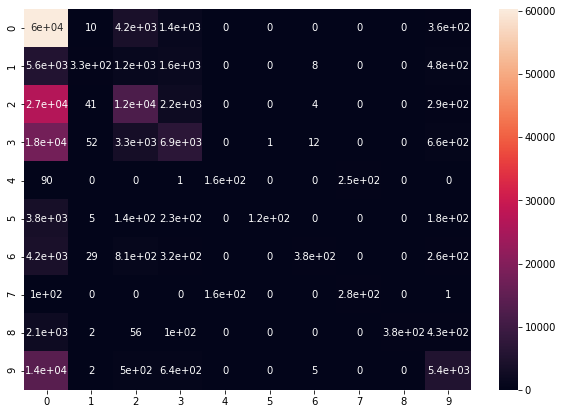

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = []
df_cm = pd.DataFrame(cm, index = [i for i in range(10)],
                  columns = [i for i in range(10)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)